In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(Path('Resources/crypto_data.csv'), index_col=0)
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Discard all cryptocurrencies that are not being traded
df=df[df.IsTrading != 0]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Keep working algorithms
df = df[df.Algorithm.isna()==False]
df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# drop the `IsTrading` column from the dataframe
df = df.drop(columns='IsTrading')
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
# Null values
for column in df.columns: 
    print(f"Column {column}: {df[column].isnull().sum()} null values.")

Column CoinName: 0 null values.
Column Algorithm: 0 null values.
Column ProofType: 0 null values.
Column TotalCoinsMined: 459 null values.
Column TotalCoinSupply: 0 null values.


In [7]:
# Remove all rows that have at least one null value
df = df[~(df.isna() == True).any(axis=1)]

In [8]:
# Null values
for column in df.columns: 
    print(f"Column {column}: {df[column].isnull().sum()} null values.")

Column CoinName: 0 null values.
Column Algorithm: 0 null values.
Column ProofType: 0 null values.
Column TotalCoinsMined: 0 null values.
Column TotalCoinSupply: 0 null values.


In [9]:
# Filter for cryptocurrencies that have been mined
df=df[~(df.TotalCoinsMined <= 0)]

# delete the `CoinName` from the original dataframe
coin_name_df = pd.DataFrame(df.CoinName)

df1=df.drop(columns='CoinName')

df.head()


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [10]:
coin_name_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [11]:
# convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. 
# To accomplish this task, use Pandas to create dummy variables. 
X = pd.get_dummies(df1, columns=['Algorithm', 'ProofType'])
X


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [13]:
# Perform dimensionality reduction with PCA. 
# preserve 90% of the explained variance in dimensionality reduction 
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)

X_pca=pca.fit_transform(X_scaled)

X_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         2.90961978e-16,  3.56816006e-15, -3.79522227e-15],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         6.63461107e-16,  3.64207065e-15, -3.54524975e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         2.33944112e-15, -4.00107917e-14,  8.27366876e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -7.57014785e-15, -3.05064414e-14,  3.03994457e-14],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
        -1.00614492e-15,  4.35656105e-15,  5.08980461e-16],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         3.80522073e-15,  1.78387783e-15, -3.67931161e-15]])

In [14]:
print(X_pca.shape)

(532, 74)


In [15]:
# further reduce the dataset dimensions with t-SNE, run t-SNE on the principal components: the output of the PCA transformation
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)    

tsne_features = tsne.fit_transform(X_scaled)

tsne_features.shape

(532, 2)

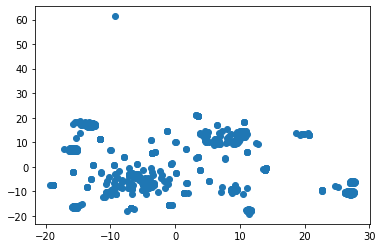

In [16]:
# create a scatter plot of the t-SNE output
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X,y)
plt.show()

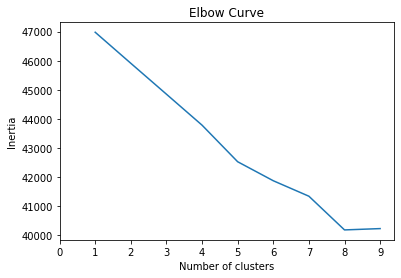

In [17]:
# elbow plot to identify the best number of clusters; for-loop to determine the inertia for each `k` between 1 through 10
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(10)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters? 

Cryptocurrencies cannot be clustered together. Scatter and Elbow plots are not favorable for clusters. 